Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 5.2 MB/s 
gen	nevals	max     	min  	med      	std      
0  	20    	0.174333	1e-05	0.0938808	0.0571087
1  	20    	0.217831	1e-05	0.111455 	0.0633684
2  	20    	0.220824	1e-05	0.13648  	0.0529686
3  	20    	0.217315	0.0604	0.152739 	0.0388537
4  	20    	0.213443	1e-05 	0.119269 	0.0682558
5  	20    	0.213443	1e-05 	0.154527 	0.048911 
6  	20    	0.213443	0.11339	0.170797 	0.0317065
7  	20    	0.213443	1e-05  	0.151679 	0.0594612
8  	20    	0.213443	0.11339	0.174889 	0.0337636
9  	20    	0.213443	0.129974	0.184891 	0.0276105
10 	20    	0.213443	0.129974	0.194585 	0.0247005
11 	20    	0.213443	0.154333	0.199447 	0.0190458
12 	20    	0.213443	0.154333	0.190625 	0.0198245
13 	20    	0.213443	0.154333	0.195254 	0.0191769
14 	20    	0.213443	0.154333	0.194754 	0.0210365
15 	20    	0.213443	0.154333	0.201576 	0.0169363
16 	20    	0.213443	0.154333	0.1

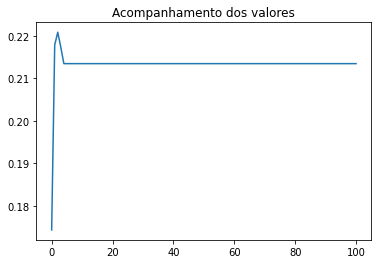

In [2]:
#ag com deap
import random
import numpy
!pip install deap
from deap import base
from deap import creator
from deap import algorithms
from deap import tools
import matplotlib.pyplot as plt

class Produto():
    def __init__(self, nome, espaco, valor):
        self.nome = nome
        self.espaco = espaco
        self.valor = valor
        
lista_produtos = []
lista_produtos.append(Produto("Geladeira Dako", 0.751, 999.90))
lista_produtos.append(Produto("Iphone 6", 0.0000899, 2911.12))
lista_produtos.append(Produto("TV 55' ", 0.400, 4346.99))
lista_produtos.append(Produto("TV 50' ", 0.290, 3999.90))
lista_produtos.append(Produto("TV 42' ", 0.200, 2999.00))
lista_produtos.append(Produto("Notebook Dell", 0.00350, 2499.90))
lista_produtos.append(Produto("Ventilador Panasonic", 0.496, 199.90))
lista_produtos.append(Produto("Microondas Electrolux", 0.0424, 308.66))
lista_produtos.append(Produto("Microondas LG", 0.0544, 429.90))
lista_produtos.append(Produto("Microondas Panasonic", 0.0319, 299.29))
lista_produtos.append(Produto("Geladeira Brastemp", 0.635, 849.00))
lista_produtos.append(Produto("Geladeira Consul", 0.870, 1199.89))
lista_produtos.append(Produto("Notebook Lenovo", 0.498, 1999.90))
lista_produtos.append(Produto("Notebook Asus", 0.527, 3999.00))

espacos = []
valores = []
nomes = []
for produto in lista_produtos:
    espacos.append(produto.espaco)
    valores.append(produto.valor)
    nomes.append(produto.nome)
limite = 3

toolbox = base.Toolbox()
creator.create("FitnessMax", base.Fitness, weights=(1.0, ))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_bool, n=len(espacos))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    
def avaliacao(individual):
    nota = 0
    soma_espacos = 0
    for i in range(len(individual)):
        if individual[i] == 1:
            nota +=valores[i]
            soma_espacos += espacos[i]
    if soma_espacos > limite: 
        nota = 1
    return nota / 100000,
toolbox.register("evaluate", avaliacao)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb = 0.01)
toolbox.register("select", tools.selRoulette)

if __name__ == "__main__":
    # random.seed(1)
    populacao = toolbox.population(n = 20)
    probabilidade_crossover = 1.0
    probabilidade_mutacao = 0.01
    numero_geracoes = 100

    estatisticas = tools.Statistics(key=lambda individuo: individuo.fitness.values)  
    estatisticas.register("max", numpy.max)
    estatisticas.register("min", numpy.min)
    estatisticas.register("med", numpy.mean)
    estatisticas.register("std", numpy.std)
    populacao, info = algorithms.eaSimple(populacao, toolbox, 
                                          probabilidade_crossover,
                                          probabilidade_mutacao, 
                                          numero_geracoes, estatisticas) 
                                    
    melhores = tools.selBest(populacao, 2)
    for individuo in melhores: 
        print(individuo)
        print(individuo.fitness)
        # print(individuo[0])
        soma = 0
        for i in range(len(lista_produtos)):
            if individuo[i] ==1: 
                soma += valores[i]
                print("NOme: %s R$ %s" % (lista_produtos[i].nome, lista_produtos[i].valor))
        print("Melhor solução: %s" % soma)        
    valores_grafico = info.select("max")
    plt.plot(valores_grafico)
    plt.title("Acompanhamento dos valores")
    plt.show()